Epoch 1/1000
10/10 [==============================] - 0s 9ms/step - loss: 4.9162 - mae: 4.9162 - val_loss: 7.1734 - val_mae: 7.1734
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.8569 - mae: 4.8569 - val_loss: 7.0752 - val_mae: 7.0752
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.7984 - mae: 4.7984 - val_loss: 6.9803 - val_mae: 6.9803
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.7401 - mae: 4.7401 - val_loss: 6.8904 - val_mae: 6.8904
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.6852 - mae: 4.6852 - val_loss: 6.8020 - val_mae: 6.8020
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.6315 - mae: 4.6315 - val_loss: 6.7179 - val_mae: 6.7179
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.5761 - mae: 4.5761 - val_loss: 6.6394 - val_mae: 6.6394
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.

[]

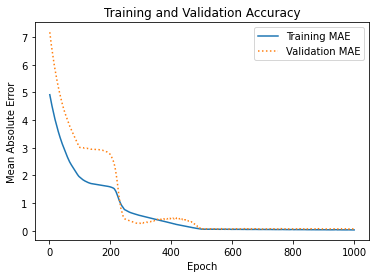

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers import Dense
from keras.models import Sequential


training_dataset = pd.DataFrame([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 2],
    [2, 0, 2],
    [2, 1, 3],
    [3, 0, 3],
    [3, 1, 4],
    [4, 0, 4],
    [4, 1, 5]
])

x_train = training_dataset.iloc[:, 0:2] # ? iets van alle [0]'s naar 1 array?
y_train = training_dataset.iloc[:, 2] # ? same maar dan [1]'s?

test_dataset = pd.DataFrame([
    [0, 3, 3],
    [1, 3, 4],
    [2, 3, 5],
    [3, 2, 5],
    [0, 4, 4]
])

x_test = test_dataset.iloc[:, 0:2] # ? iets van alle [0]'s naar 1 array?
y_test = test_dataset.iloc[:, 2] # ? same maar dan [1]'s?

model = Sequential() # zet lagen model op
model.add(Dense(3, activation='relu', input_dim=2)) # add input laag
model.add(Dense(1)) # output laag (nummer)
model.compile(loss='mae', optimizer='adam', metrics=['mae']) # mae is een manier van error bepalen, ?, ?

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=1) # input 1, input 2, test met test data, training cycles, 100 rows trainen/testen voordat ie zichzelf aanpast

import matplotlib.pyplot as plt

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [42]:
# two numbers to add (addition must not exceed 5)
x_pred = 3
y_pred = 9

prediction = model.predict(np.array([[x_pred, y_pred]]))

print(f"The model will try to add {x_pred} + {y_pred}:", round(prediction[0][0])) # predict met een array van eigen inputs

The model will try to add 3 + 9: 12
